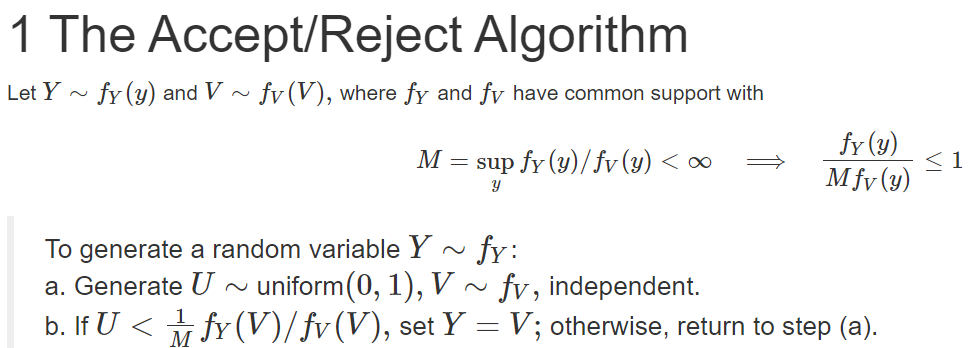

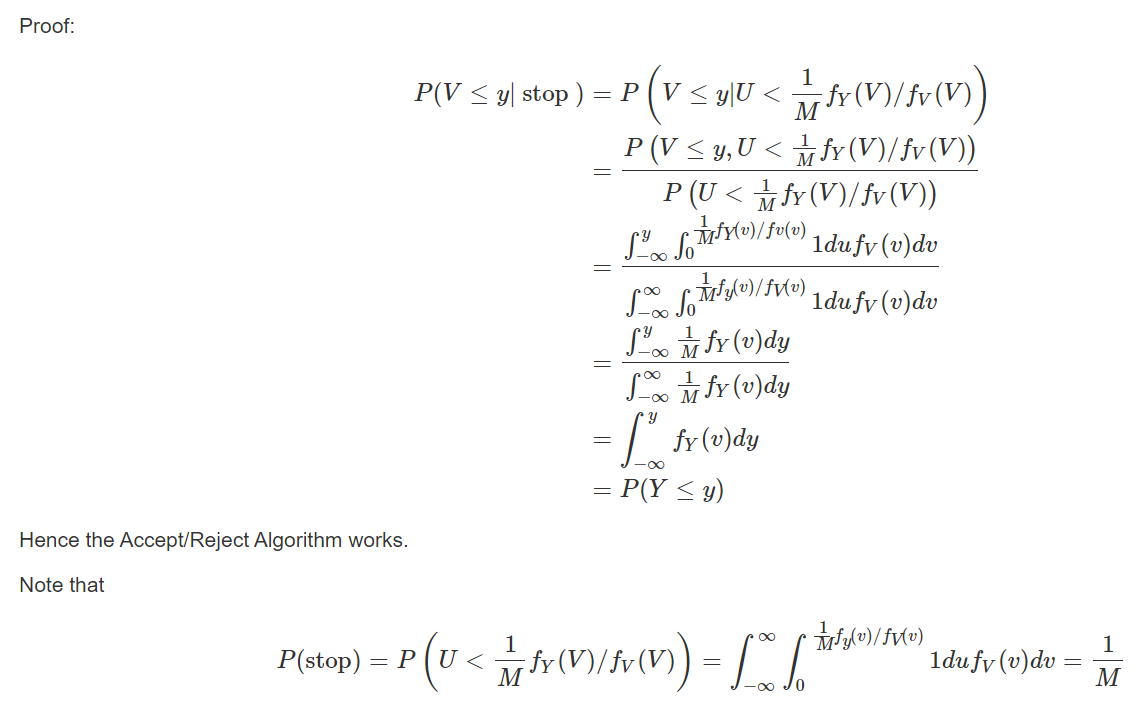

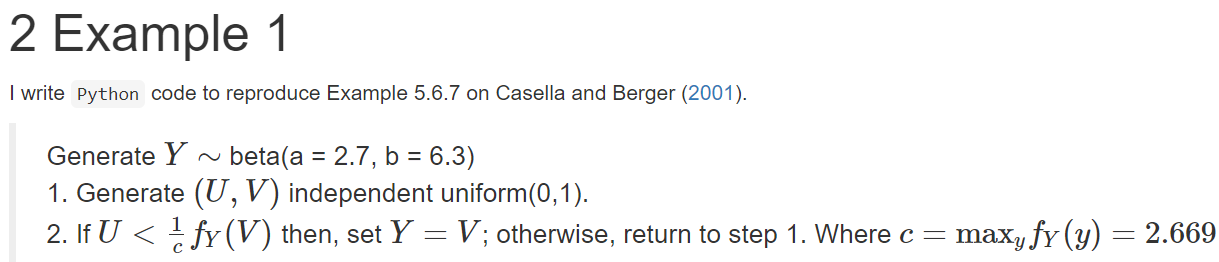

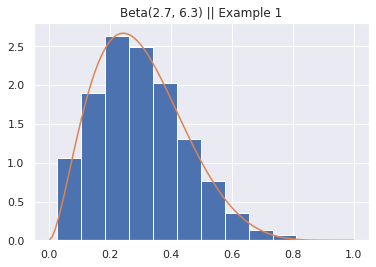

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
import seaborn as sns
sns.set()
np.random.seed(523)

def f1(x):
  a = 2.7
  b = 6.3
  beta = gamma(a) * gamma(b) /gamma(a + b)
  p = x ** (a - 1) * (1-x) ** (b - 1)
  return 1/beta * p

mode = (2.7-1)/(2.7+6.3-2) ##Mode of Beta distribution
c = f1(mode)

def beta_gen(n):
  i = 0
  output = np.zeros(n)
  while i < n:
    U = np.random.uniform(size = 1)
    V = np.random.uniform(size = 1)
    if U < 1/c * f1(V):
      output[i] = V
      i = i + 1
  return output

px = np.arange(0,1+0.01,0.01)
py = f1(px)

Y = beta_gen(n = 1000)
fig,ax = plt.subplots()
temp = ax.hist(Y,density=True)
ax.plot(px,py)
plt.title("Beta(2.7, 6.3) || Example 1")
plt.show()

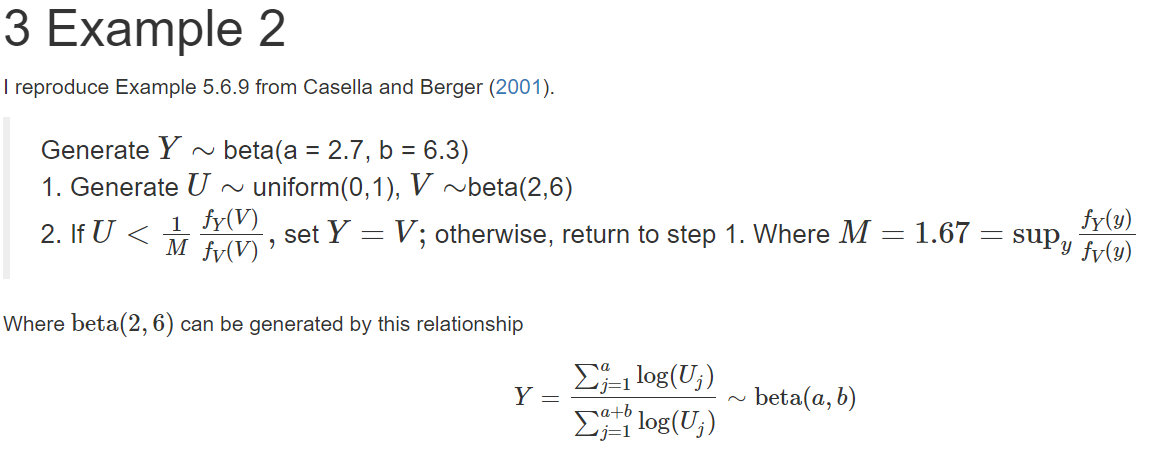

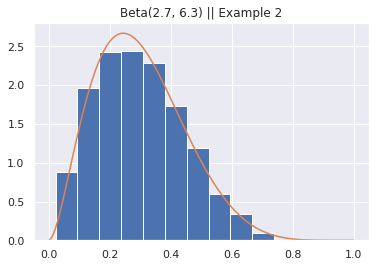

In [8]:
##Beta(2,6) Generation
def beta_gen2(n): 
  i = 0
  output = np.zeros(n)
  while i < n:
    U = np.random.uniform(size = 2 + 6)
    p1 = np.sum(np.log(U[0:2]))
    p2 = np.sum(np.log(U))
    output[i] = p1/p2
    i = i + 1
  return output

##PDF of Beta(2,6)
def f2(x):
  a = 2
  b = 6
  beta = gamma(a) * gamma(b) /gamma(a + b)
  p = x ** (a - 1) * (1-x) ** (b - 1)
  return 1/beta * p

def beta_gen3(n):
  i = 0
  M = 1.67
  output = np.zeros(n)
  while i < n:
    U = np.random.uniform(size = 1)
    V = beta_gen2(1)
    if U < (1/M) * (f1(V)/f2(V)):
      output[i] = V
      i = i + 1
  return output
  
Y = beta_gen3(n = 1000)
fig,ax = plt.subplots()
temp = ax.hist(Y,density=True)
ax.plot(px,py)
plt.title("Beta(2.7, 6.3) || Example 2")
plt.show()

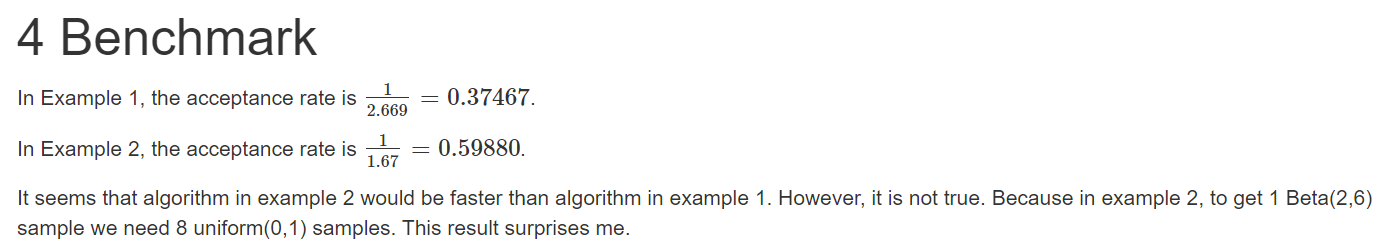

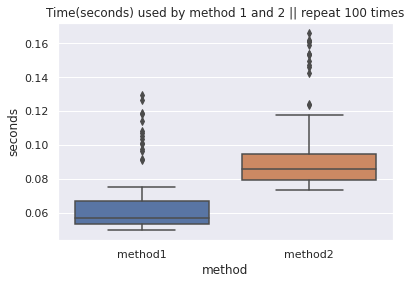

In [9]:
import timeit

method1 = timeit.repeat(lambda :beta_gen(n = 1000), repeat = 100, number = 1)
method2 = timeit.repeat(lambda :beta_gen3(n = 1000), repeat = 100, number = 1)
df1 = pd.DataFrame({"seconds":method1,"method":"method1"})
df2 = pd.DataFrame({"seconds":method2,"method":"method2"})
df_plot = pd.concat((df1,df2))
fig,ax = plt.subplots()
ax = sns.boxplot(x = "method", y = "seconds", data = df_plot)
ax.set_title("Time(seconds) used by method 1 and 2 || repeat 100 times")
plt.show()